## Structural Breaks and Macroeconomic Shocks

Macroeconomic relationships are often unstable during crises.
In this notebook, we examine whether major shocks (COVID, inflation surge)
coincide with visible structural breaks in retail activity and macro indicators.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/macro_panel.csv")
df["month_dt"] = pd.to_datetime(df["month"])

In [2]:
ea7_rti = (
    df.groupby("month_dt")["rti_index"]
      .mean()
      .reset_index()
)

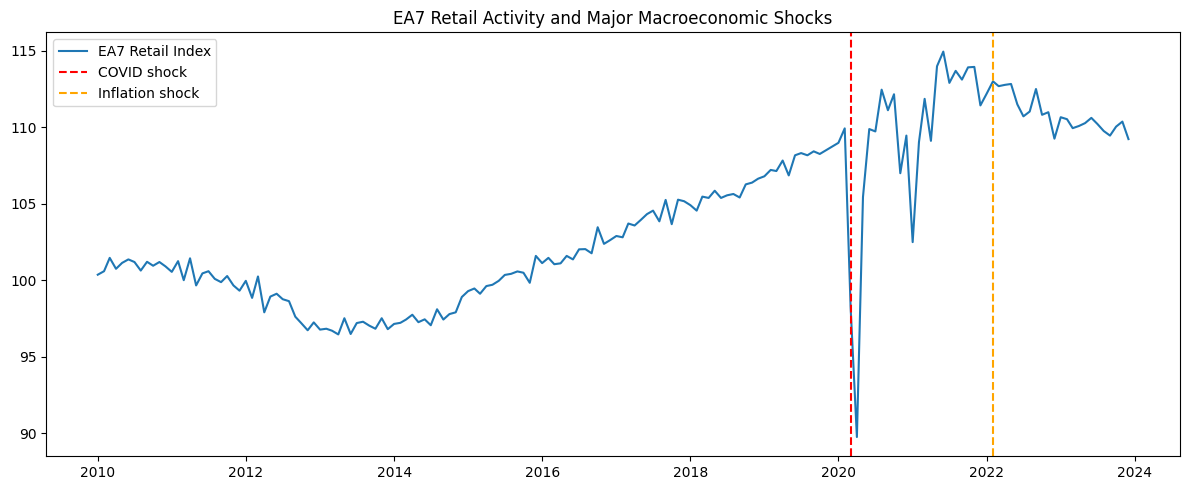

In [3]:
plt.figure(figsize=(12,5))
plt.plot(ea7_rti["month_dt"], ea7_rti["rti_index"], label="EA7 Retail Index")

plt.axvline(pd.Timestamp("2020-03-01"), color="red", linestyle="--", label="COVID shock")
plt.axvline(pd.Timestamp("2022-02-01"), color="orange", linestyle="--", label="Inflation shock")

plt.title("EA7 Retail Activity and Major Macroeconomic Shocks")
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
pre = ea7_rti[ea7_rti["month_dt"] < "2020-03-01"]["rti_index"]
post = ea7_rti[ea7_rti["month_dt"] >= "2020-03-01"]["rti_index"]

pre.mean(), post.mean()

(np.float64(101.49449648711945), np.float64(110.14099378881986))

In [5]:
# Sort properly
df = df.sort_values(["country", "month_dt"])

# Monthly RTI growth by country
df["rti_growth"] = (
    df.groupby("country")["rti_index"]
      .pct_change() * 100
)

In [6]:
ea7 = (
    df.groupby("month_dt")[["rti_growth","hicp_index"]]
      .mean()
      .dropna()
)

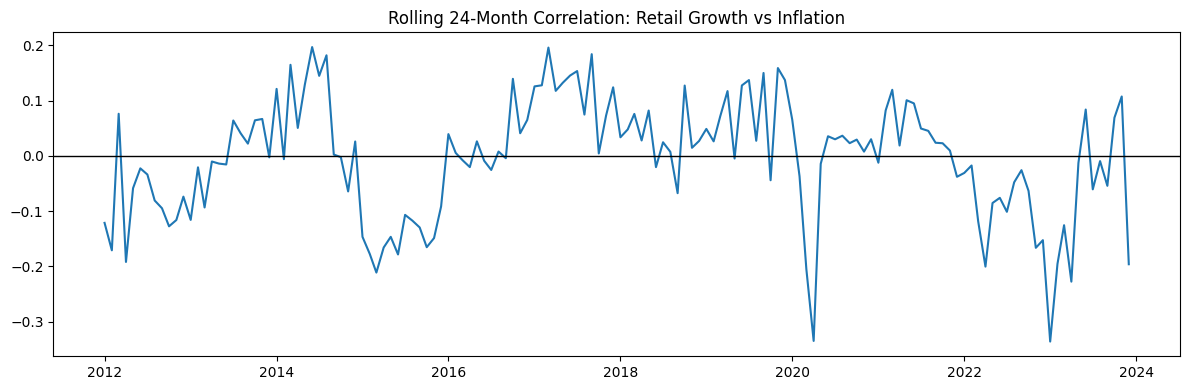

In [7]:
ea7 = (
    df.groupby("month_dt")[["rti_growth","hicp_index"]]
      .mean()
      .dropna()
)

rolling_corr = (
    ea7["rti_growth"]
    .rolling(24)
    .corr(ea7["hicp_index"])
)

plt.figure(figsize=(12,4))
plt.plot(rolling_corr)
plt.axhline(0, color="black", linewidth=1)
plt.title("Rolling 24-Month Correlation: Retail Growth vs Inflation")
plt.tight_layout()
plt.show()

### Interpretation

• Retail activity exhibits clear structural breaks during major macroeconomic shocks  
• The COVID period represents a regime shift rather than a temporary deviation  
• Inflation–retail relationships are time-varying, especially after 2021  
• This cautions against assuming stable macro relationships in forecasting models